In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install geopandas

In [ ]:
pip install mapboxgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chroma-py: filename=chroma_py-0.1.0.dev1-py3-none-any.whl size=5093 sha256=9eec6ad3f9ee3e282e4663e0e3817d92ad5095ec56492480eb176c49cba819d0
  Stored in directory: /root/.cache/pip/wheels/45/89/c1/b8b2a40648c05fe0c0618b1de25aecde35c972e19cd4cb2341
Successfully built chroma-py


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json

In [ ]:
korea = gpd.read_file('/content/drive/MyDrive/BND_ADM_DONG_PG.shp', encoding="cp949")
korea.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry
0,20230701,사직동,11010530,"POLYGON ((197702.069 553187.311, 197703.431 55..."
1,20230701,삼청동,11010540,"POLYGON ((198170.457 553770.678, 198172.189 55..."
2,20230701,부암동,11010550,"POLYGON ((196621.023 556395.880, 196628.323 55..."
3,20230701,평창동,11010560,"POLYGON ((197800.719 559064.245, 197782.581 55..."
4,20230701,한남동,11030740,"POLYGON ((200404.268 550031.323, 200404.019 55..."


<Axes: >

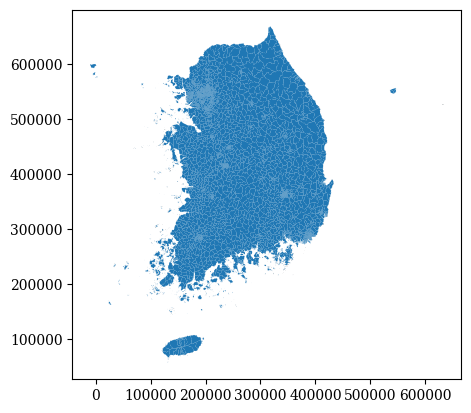

In [ ]:
korea.plot()

- 행정동코드 & 행정동명

|-|-|-|-|-|
|-|-|-|-|-|
|11050530 화양동|11050540 군자동|11050550 중곡1동|11050560 중곡2동|11505570 중곡3동|
|11050580 중곡4동|11050590 능동|11050600 구의1동|11050610 구의2동|11050620 구의3동|
|11050630 광장동|11050640 자양1동|11050650 자양2동|11050660 자양3동|11050670 자양4동|



In [ ]:
gwangjin = korea[korea['ADM_CD'].str.startswith('11050')] # 서울시 행정동 코드 '11' + 광진구 행정동 코드 '050'
gwangjin.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry
164,20230701,자양3동,11050660,"POLYGON ((206502.191 548833.470, 206557.876 54..."
165,20230701,구의2동,11050610,"POLYGON ((209270.675 550767.066, 209269.698 55..."
1203,20230701,화양동,11050530,"POLYGON ((206227.001 549833.195, 206236.125 54..."
1204,20230701,군자동,11050540,"POLYGON ((207001.484 550802.870, 206989.732 55..."
1206,20230701,중곡1동,11050550,"POLYGON ((207024.303 550852.620, 207024.085 55..."


In [ ]:
gwangjin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 15 entries, 164 to 1220
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  15 non-null     object  
 1   ADM_NM     15 non-null     object  
 2   ADM_CD     15 non-null     object  
 3   geometry   15 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.1+ KB


<Axes: >

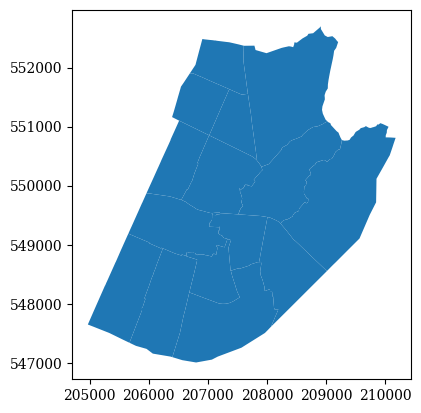

In [ ]:
gwangjin.plot() # 광진구 행정동 경계

In [ ]:
gwangjin

,BASE_DATE,ADM_NM,ADM_CD,geometry
164,20230701,자양3동,11050660,"POLYGON ((206502.191 548833.470, 206557.876 54..."
165,20230701,구의2동,11050610,"POLYGON ((209270.675 550767.066, 209269.698 55..."
1203,20230701,화양동,11050530,"POLYGON ((206227.001 549833.195, 206236.125 54..."
1204,20230701,군자동,11050540,"POLYGON ((207001.484 550802.870, 206989.732 55..."
1206,20230701,중곡1동,11050550,"POLYGON ((207024.303 550852.620, 207024.085 55..."
1208,20230701,중곡2동,11050560,"POLYGON ((207575.037 551541.845, 207575.275 55..."
1210,20230701,중곡3동,11050570,"POLYGON ((207121.904 552457.909, 207124.827 55..."
1211,20230701,중곡4동,11050580,"POLYGON ((208981.056 552544.566, 209031.744 55..."
1212,20230701,능동,11050590,"POLYGON ((207310.961 550711.636, 207319.567 55..."
1213,20230701,구의1동,11050600,"POLYGON ((207605.418 549507.496, 207623.322 54..."


In [ ]:
gwangjin = gwangjin.sort_values('ADM_CD')
gwangjin.index = [_ for _ in range(0,15)]
gwangjin

,BASE_DATE,ADM_NM,ADM_CD,geometry
0,20230701,화양동,11050530,"POLYGON ((206227.001 549833.195, 206236.125 54..."
1,20230701,군자동,11050540,"POLYGON ((207001.484 550802.870, 206989.732 55..."
2,20230701,중곡1동,11050550,"POLYGON ((207024.303 550852.620, 207024.085 55..."
3,20230701,중곡2동,11050560,"POLYGON ((207575.037 551541.845, 207575.275 55..."
4,20230701,중곡3동,11050570,"POLYGON ((207121.904 552457.909, 207124.827 55..."
5,20230701,중곡4동,11050580,"POLYGON ((208981.056 552544.566, 209031.744 55..."
6,20230701,능동,11050590,"POLYGON ((207310.961 550711.636, 207319.567 55..."
7,20230701,구의1동,11050600,"POLYGON ((207605.418 549507.496, 207623.322 54..."
8,20230701,구의2동,11050610,"POLYGON ((209270.675 550767.066, 209269.698 55..."
9,20230701,구의3동,11050620,"POLYGON ((208172.878 549404.420, 208188.854 54..."


In [ ]:
gwangjin.drop(['BASE_DATE'], axis=1, inplace=True) # 필요없는 컬럼 삭제
gwangjin.head(2)

,ADM_NM,ADM_CD,geometry
0,화양동,11050530,"POLYGON ((206227.001 549833.195, 206236.125 54..."
1,군자동,11050540,"POLYGON ((207001.484 550802.870, 206989.732 55..."


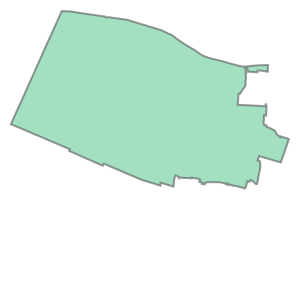

In [ ]:
gwangjin["geometry"][0] # 화양동

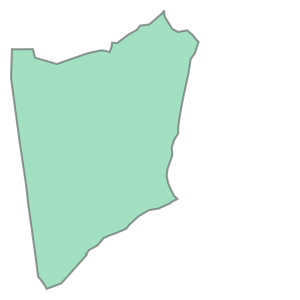

In [ ]:
gwangjin["geometry"][5] # 중곡4동

In [ ]:
population = pd.read_excel('/content/drive/MyDrive/광진구_주민등록인구_202403 (만듦).xlsx')
population.head()

,행정동코드,행정동명,총인구수
0,11050530,화양동,23343
1,11050540,군자동,18996
2,11050550,중곡1동,15228
3,11050560,중곡2동,20406
4,11050570,중곡3동,15628


In [ ]:
population.rename(columns={'행정동코드':'ADM_CD'}, inplace=True)
population.rename(columns={'행정동명':'ADM_NM'}, inplace=True)
population.rename(columns={'총인구수':'population'}, inplace=True)
# population.index = ['화양동', '군자동', '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '구의1동', '구의2동', '구의3동', '광장동',
#                       '자양1동', '자양2동', '자양3동', '자양4동']
# population.drop(['행정동명', 'ADM_CD'], axis=1, inplace=True)
population

,ADM_CD,ADM_NM,population
0,11050530,화양동,23343
1,11050540,군자동,18996
2,11050550,중곡1동,15228
3,11050560,중곡2동,20406
4,11050570,중곡3동,15628
5,11050580,중곡4동,27508
6,11050590,능동,11053
7,11050600,구의1동,23116
8,11050610,구의2동,25611
9,11050620,구의3동,27825


In [ ]:
locs =  {
      '화양동': (37.5432534, 127.07341),
      '군자동': (37.5530406, 127.0736767),
      '중곡1동': (37.5616345, 127.0786338),
      '중곡2동': (37.5589748, 127.0846216),
      '중곡3동': (37.5677228, 127.0825871),
      '중곡4동': (37.5614997, 127.0910101),
      '능동': (37.5505785, 127.0817378),
      '구의1동': (37.5414713, 127.0857346),
      '구의2동': (37.5499154, 127.0922446),
      '구의3동': (37.5376586, 127.0931528),
      '광장동': (37.5478239, 127.1047149),
      '자양1동': (37.5362014, 127.0802766),
      '자양2동': (37.529703, 127.085840),
      '자양3동': (37.5333209, 127.0716878),
      '자양4동': (37.5357718, 127.0647148)
}

In [ ]:
import folium

geo_data = '/content/drive/MyDrive/geo_gwangjin_qgis.geojson'
m = folium.Map(location=(37.5467202379314, 127.085744097681),
                tiles="OpenStreetMap", width=850, height=850, zoom_start=14)

m.choropleth(
    geo_data=geo_data,
    data=population,
    columns=['ADM_CD', 'population'],
    key_on='properties.ADM_CD',
    fill_color='YlGnBu',
    highlight=True,
    legend_name = 'Population'
)

for name, loc in locs.items():
    folium.Marker(location=loc, popup=name).add_to(m)

folium.LayerControl().add_to(m)
m



---



---



---



---



---


mapbox



In [ ]:
# merged = population.merge(gwangjin2, on='ADM_CD')
# population2 = population.copy()
# population2.drop(['ADM_CD', 'ADM_NM'], axis=1, inplace=True)
# merged = pd.concat([gwangjin, population], axis=1)
# merged

,ADM_NM,ADM_CD,geometry,population
0,화양동,11050530,"POLYGON ((206227.001 549833.195, 206236.125 54...",23343
1,군자동,11050540,"POLYGON ((207001.484 550802.870, 206989.732 55...",18996
2,중곡1동,11050550,"POLYGON ((207024.303 550852.620, 207024.085 55...",15228
3,중곡2동,11050560,"POLYGON ((207575.037 551541.845, 207575.275 55...",20406
4,중곡3동,11050570,"POLYGON ((207121.904 552457.909, 207124.827 55...",15628
5,중곡4동,11050580,"POLYGON ((208981.056 552544.566, 209031.744 55...",27508
6,능동,11050590,"POLYGON ((207310.961 550711.636, 207319.567 55...",11053
7,구의1동,11050600,"POLYGON ((207605.418 549507.496, 207623.322 54...",23116
8,구의2동,11050610,"POLYGON ((209270.675 550767.066, 209269.698 55...",25611
9,구의3동,11050620,"POLYGON ((208172.878 549404.420, 208188.854 54...",27825


In [ ]:
# print(merged.crs)

EPSG:5186


In [ ]:
# merged = merged.set_crs(epsg=5179, allow_override=True)
# merged = merged.to_crs(epsg=4326)
# print(merged.crs)

EPSG:4326


In [ ]:
# merged.to_file('geo_gwangjin.geojson', driver="GeoJSON")

In [ ]:
# token = 'pk.eyJ1IjoidHdvY3Z4IiwiYSI6ImNsdW85ankxNTEweGYyanJzajNybWl3dHQifQ.b26e1wuInYpG7WeC1Xf4KQ'

# geo_data = '/content/drive/MyDrive/geo_gwangjin_qgis.geojson'

# with open(geo_data, 'rt', encoding='utf-8') as f:
#    gj = json.load(f)

# # gwangjin3 = json.load(open(geo_data, encoding='utf-8'))
# # gwangjin3

In [ ]:
# merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_NM      15 non-null     object  
 1   ADM_CD      15 non-null     object  
 2   geometry    15 non-null     geometry
 3   population  15 non-null     int64   
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.1+ KB


In [ ]:
# from mapboxgl.utils import create_color_stops
# from mapboxgl.viz import ChoroplethViz

# gj_center = [127.085744097681, 37.5467202379314]

# color_breaks = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
# color_stops = create_color_stops(color_breaks, colors='BuPu')

# viz = ChoroplethViz(
#     access_token=token,
#     data=gj,
#     color_property='population',
#     color_stops=color_stops,
#     center=gj_center,
#     zoom=10)

# viz.show()